# Question 1 : 
Consider a situation in which there are 2 inputs x1 ∈ R and x2 ∈ R
and an output y ∈ {0, 1}. Rather than presenting x1 and x2 to linear
machine, a colleague suggested that you add some pre-processing in
which you transform x1 and x2 so that the new inputs to the linar
machine are x1, x2, x1x2, x21, x22. Assume that you were thresholding
the output of the perceptron so that an output of > 0.5 is 1 and 0
otherwise. What would be the decision boundary you would realize
because of this. Be very specific. (20 points)

<h4> Answer </h4>

<body> 
    If the inputs were taken as it is, it would be a classification problem with a linear decision boundary. The reason for that being, when a linear equation is created by linear equation, it would be of the form  <br> <i> $f(x,y)=w_{1}x+w_{2}y+w_{3}$ </i>. <br> This would cause the decision boundary to be a plane as in the below graph.
Irrespective of the values of the decision boundary is always a plane as it can be seen below
<body/>
    

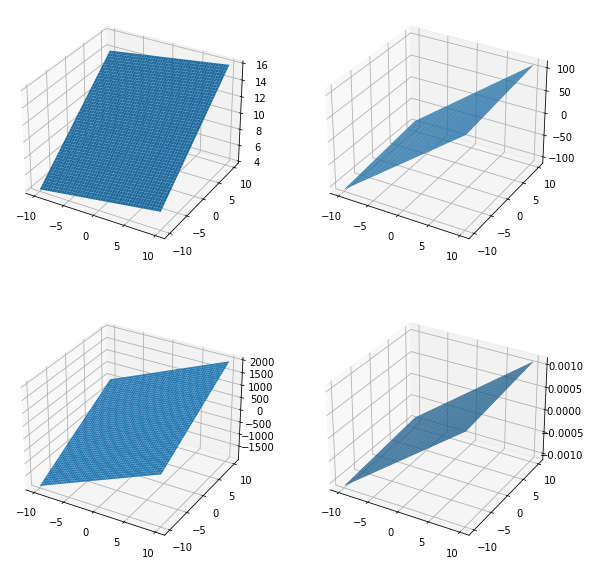

In [59]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)

fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(2, 2, 1, projection='3d')
X,Y=np.meshgrid(x,y)
Z = 0.1*X+0.5*Y+10
surf = ax.plot_surface(X, Y, Z)

ax =fig.add_subplot(2, 2, 2, projection='3d')
X,Y=np.meshgrid(x,y)
Z = 10*X+1*Y+0.1
surf = ax.plot_surface(X, Y, Z)

ax =fig.add_subplot(2, 2, 3, projection='3d')
X,Y=np.meshgrid(x,y)
Z = 100*X+100*Y+10
surf = ax.plot_surface(X, Y, Z)

ax =fig.add_subplot(2, 2, 4, projection='3d')
X,Y=np.meshgrid(x,y)
Z = 0.0001*X+0.00001*Y+0.000002
surf = ax.plot_surface(X, Y, Z)

<body> Now when the colleague adds more terms to the data, he is creating polynomial terms which would result in a polynomial equation. The new equation formed from the new data will be of the type <br><i> $f(x,y)= w_{1}x^{2}+w_{2}y^{2}+w_{3}xy+w_{4}x+w_{5}y+w_{6}$ <br> The value of $w_{3}^{2}-4w_{1}w_{2}$ would give the shape of the conic section. <br> If $w_{3}^{2}-4w_{1}w_{2}$ is less than 0, conic exist and will be either a circle of ellipse.<br> If $w_{3}^{2}-4w_{1}w_{2}$=0, the conic will be a parabola.<br> If $w_{3}^{2}-4w_{1}w_{2}$ is greater than 0, Conic will be a hyperbola <br><br>
    It can be seen from the below graphs that when polynomial terms are added, the decision boundary changes from plane to more complex shapes. This helps to make better predictions. As seen in the below graphs, the decision boundary can be parabola, hyperbola, circle or ellipse. Since the equation represents a conic section

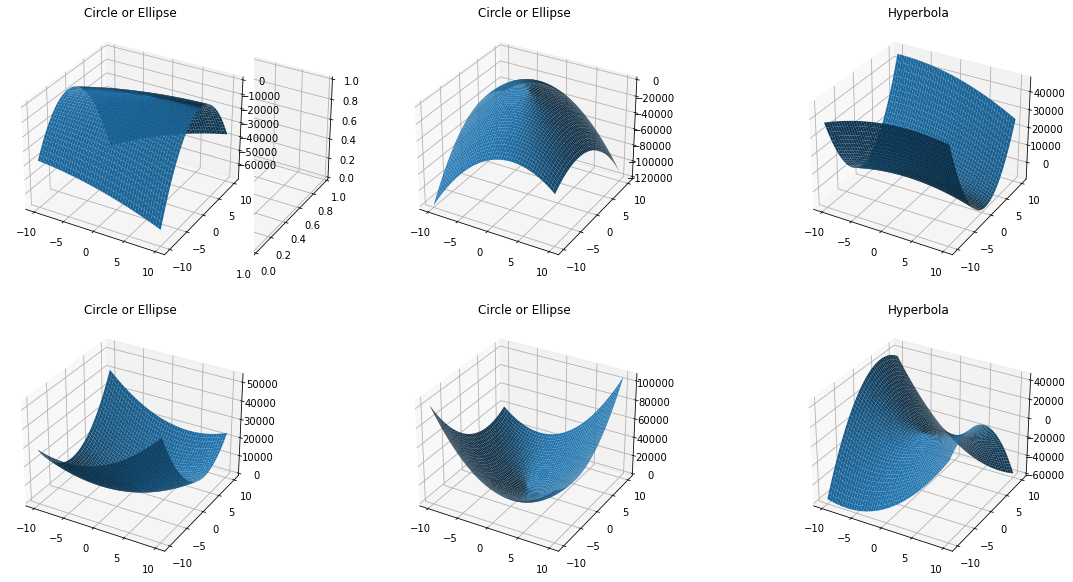

In [184]:
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)

fig = plt.figure(figsize=(20,10))
ax =fig.add_subplot(2, 2, 1, projection='3d')
X,Y=np.meshgrid(x,y)



for i in range(6):
    (w1,w2,w3,w4,w5,w6)=np.random.randint(-500,500,6)
    Z = (w1*X*X)+(w2*Y*Y)+(w3*X*Y)+(w4*X)+(w5*Y)+w6
    shape=pow(w3,2)-(4*w1*w2)
    if shape<0:
        shape='Circle or Ellipse'
    elif shape==0:
        shape='Parabola'
    elif shape>0:
        shape='Hyperbola'
        
    ax =fig.add_subplot(2,3,i+1, projection='3d')
    plt.title(str(shape))
    surf = ax.plot_surface(X, Y, Z)

# Question 2

A colleague suggested adding a regularization parameter of the type,
∑
i
w2i
1 + w2i
(1)
to the usual sum-of-squared error loss function. The symbols have the
meaning as discussed in class. What do you think would be the effect?
Be very specific (20 points)

The Loss function can be represented as below where the last term, $\lambda(xx)$  is the regularisation parameter. 

$J(w) =\sum \limits _{i=1} ^{N} L(y^{l},\hat{f}(x^{l};w))+\lambda ( xx )$

For Ridge Regression, the above equation changes to  <br> $J(w) =\sum \limits _{i=1} ^{N} L(y^{l},\hat{f}(x^{l};w))+\lambda (x^{2})$

Here, for small values of x, the regularisation parameter becomes very less. For higher values of x, the reularisation parmeter becomes very high as per the square term.<br>Creating a simulation of the same using different values of x

In [176]:
values_of_x=[0.001,0.01,0.1,0.5,0.9,1,5,10,20,100,200,1000,10000]

In [177]:
#Assuming Lambda to be one
ridge_regularisation=[np.round(pow(i,2),3) for i in values_of_x]

For Lasso Regression, the above equation changes to  <br> $J(w) =\sum \limits _{i=1} ^{N} L(y^{l},\hat{f}(x^{l};w))+\lambda (|x|)$

Compared to Ridge Regression, the lasso regression does't penalise large values of x as much as a ridge regression because of the absence of the square term. The absolute value, instead helps to increase the value of the regularisation parameter in a linear way. <br>
Creating a simulation of the error term using different values of x

In [178]:
#Assuming Lambda to be one
lasso_regularisation=[np.round(abs(i),3) for i in values_of_x]

For the given situation, the regularisation parameter becomes $\sum \limits_{i} \frac{x^{2}}{1+x^{2}}$. This factor, unlike Ridge an Lasso would fail to penalise large values of x and it will get saturated at a maximum value of 1. <br> When x becomes very large the regularisation parameter becomes very close to one. When the value of x is very low, the regularisation parameter becomes almost equal to x. <br> Hence, it fails to penalise for higher values of x and hence will be a bad regularisatio parameter compared to ridge and lasso. 


Creating a simulation for the error term using different values of x

In [179]:
#Assuming Lambda to be one
new_regularisation=[np.round((pow(i,2))/(1+pow(i,2)),3) for i in values_of_x]

#### Plotting the change in values of all three regularisations

/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Custom Regularisation'}>

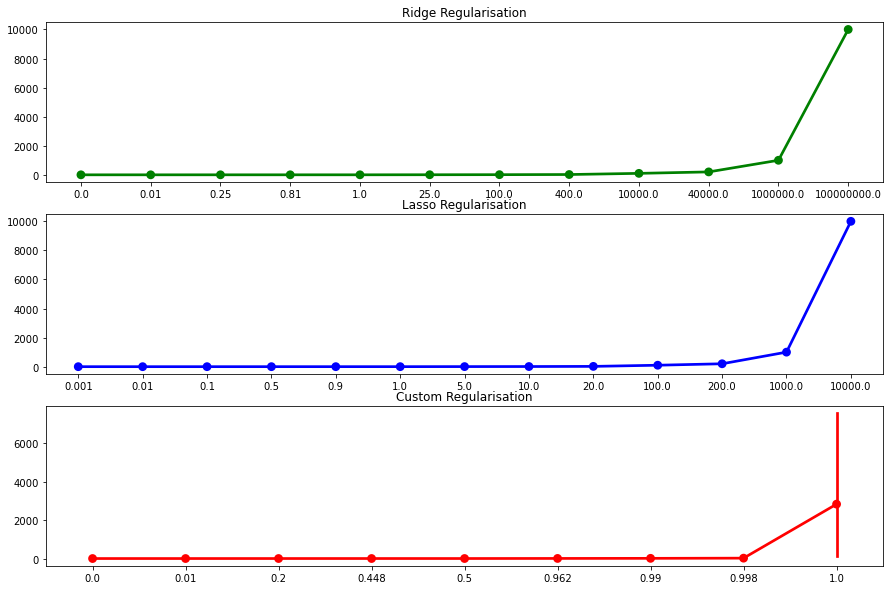

In [181]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.ylim(0,1500)
plt.subplot(3,1,1)
plt.title('Ridge Regularisation')
sns.pointplot(ridge_regularisation,values_of_x,color='green')
plt.subplot(3,1,2)
plt.title('Lasso Regularisation')
sns.pointplot(lasso_regularisation,values_of_x,color='blue')
plt.subplot(3,1,3)
plt.title('Custom Regularisation')
sns.pointplot(new_regularisation,values_of_x,color='red')

Here, It can be seen that<br>: Ridge regression penalised large values of x, whereas<br>: Lasso Regression doesn't penalise large values as much as Ridge<br>: However, the custom regularisation function does not penalise the large terms as it saturates at 1.For values less than 1 the penalisation is less than 0.5. For values between 1 to 100, the penalisation approximates to 1 and it saturates for all values up to infinity. The function would always try to regularise in the same way for values greater than 100 to infinity, which is a bad quality for a regularisation function